In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier

In [90]:
df = pd.read_csv('creditcard.csv')
df.head(50)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [91]:
df['Class']

0         0
1         0
2         0
3         0
4         0
         ..
284802    0
284803    0
284804    0
284805    0
284806    0
Name: Class, Length: 284807, dtype: int64

In [92]:
df['Class'].value_counts()

Class
0    284315
1       492
Name: count, dtype: int64

In [93]:
fraud_count = df['Class'].value_counts()
print(f"Class distribution:\n{fraud_count}")
print(f"Fraud percentage: {fraud_count[1]/len(df)*100:.4f}%")

Class distribution:
Class
0    284315
1       492
Name: count, dtype: int64
Fraud percentage: 0.1727%


Text(0.5, 0, 'Amount')

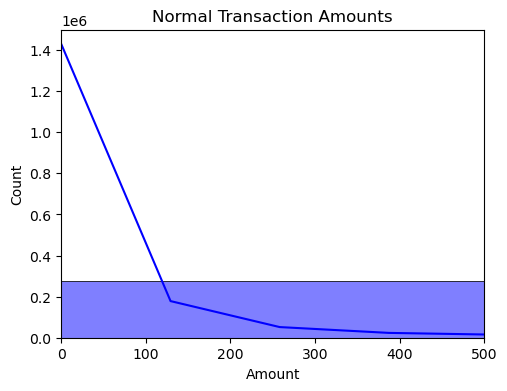

In [94]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(df[df['Class']==0]['Amount'], bins=50, kde=True, color='blue', label='Normal')
plt.title('Normal Transaction Amounts')
plt.xlim(0, 500)
plt.xlabel('Amount')

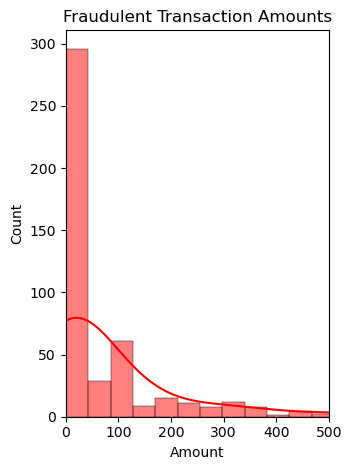

In [95]:
plt.subplot(1, 2, 2)
sns.histplot(df[df['Class']==1]['Amount'], bins=50, kde=True, color='red', label='Fraud')
plt.title('Fraudulent Transaction Amounts')
plt.xlim(0, 500)
plt.xlabel('Amount')
plt.tight_layout()
plt.show()

In [96]:
correlations = df.corr()['Class'].sort_values(ascending=False)
print("\nTop correlations with fraud:")
print(correlations.head(10))
print("\nBottom correlations with fraud:")
print(correlations.tail(10))


Top correlations with fraud:
Class    1.000000
V11      0.154876
V4       0.133447
V2       0.091289
V21      0.040413
V19      0.034783
V20      0.020090
V8       0.019875
V27      0.017580
V28      0.009536
Name: Class, dtype: float64

Bottom correlations with fraud:
V9    -0.097733
V1    -0.101347
V18   -0.111485
V7    -0.187257
V3    -0.192961
V16   -0.196539
V10   -0.216883
V12   -0.260593
V14   -0.302544
V17   -0.326481
Name: Class, dtype: float64


In [97]:
X = df.drop(['Class'], axis = 1).values
y = df["Class"].values

In [98]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

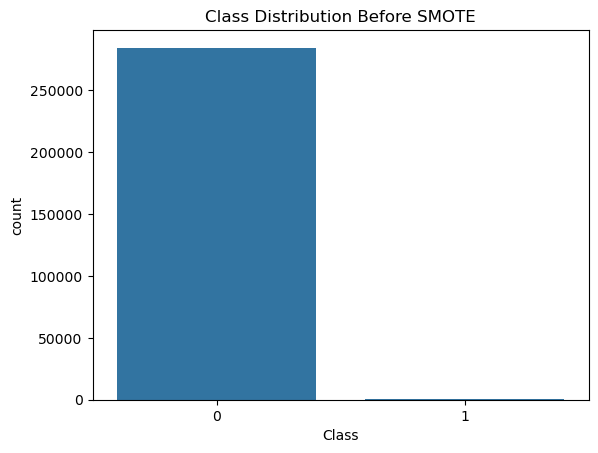

In [99]:
sns.countplot(x='Class', data=df)
plt.title('Class Distribution Before SMOTE')
plt.show()

##### Apply SMOTE

#### Shuffle the data

In [102]:
# df_resampled = pd.concat([pd.DataFrame(X_resampled), pd.DataFrame(y_resampled, columns=['Class'])], axis=1).sample(frac=1).reset_index(drop=True)
# X_shuffled = df_resampled.drop('Class', axis=1)
# y_shuffled = df_resampled['Class']

In [103]:
# X_train, X_test, y_train, y_test = train_test_split(X_shuffled, y_shuffled, test_size=0.2, random_state=42)

In [104]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

In [105]:

# model = DecisionTreeClassifier(random_state=42)
# model.fit(X_train, y_train)

In [106]:
# y_pred = model.predict(X_test)

In [107]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [108]:
# accuracy = accuracy_score(y_test, y_pred)
# precision = precision_score(y_test, y_pred)
# recall = recall_score(y_test, y_pred)
# f1 = f1_score(y_test, y_pred)
# conf_matrix = confusion_matrix(y_test, y_pred)

In [109]:
# print(f"Accuracy: {accuracy:.2f}")
# print(f"Precision: {precision:.2f}")
# print(f"Recall: {recall:.2f}")
# print(f"F1-score: {f1:.2f}")
# print(f"Confusion Matrix:\n{conf_matrix}")

In [110]:
# from sklearn.model_selection import cross_val_score
# cv_scores = cross_val_score(model, X_train, y_train, cv=5)
# print(f"Cross-validation scores: {cv_scores}")
# print(f"Average cross-validation score: {cv_scores.mean()}")

In [111]:
# import time
# from sklearn.tree import DecisionTreeClassifier
# start = time.time()
# clf = DecisionTreeClassifier()
# clf.fit(X_undersampled, y_undersampled)
# end = time.time()
# baseline_time = end - start
# print(f"Baseline training time: {baseline_time:.2f} seconds")

#### Undersampling

In [113]:
non_fraud = df[df['Class'] == 0].sample(n=y.sum(), random_state=42)  # Sample to match the number of frauds
fraud = df[df['Class'] == 1]
df_undersampled = pd.concat([non_fraud, fraud]).sample(frac=1).reset_index(drop=True)

In [114]:
X_undersampled = df_undersampled.drop('Class', axis=1)
y_undersampled = df_undersampled['Class']

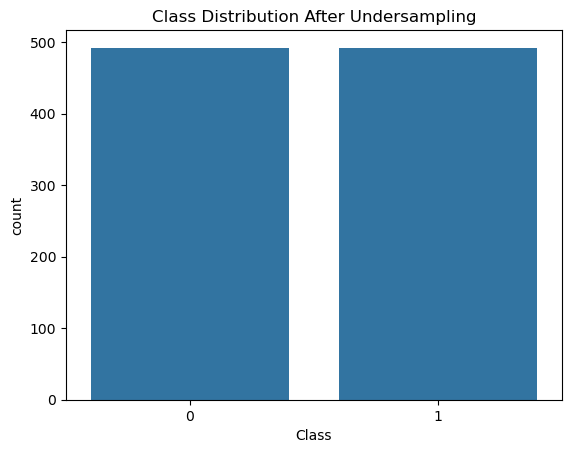

In [115]:

sns.countplot(x='Class', data=pd.DataFrame(y_undersampled, columns=['Class']))
plt.title('Class Distribution After Undersampling')
plt.show()

In [116]:
X_train_u, X_test_u, y_train_u, y_test_u = train_test_split(X_undersampled, y_undersampled, test_size=0.2, random_state=42)

In [117]:
from sklearn.preprocessing import MinMaxScaler
scaler_u = MinMaxScaler()
X_train_scaled_u = scaler_u.fit_transform(X_train_u)
X_test_scaled_u = scaler_u.transform(X_test_u)

In [118]:
model_u = DecisionTreeClassifier(random_state=42)
model_u.fit(X_train_scaled_u, y_train_u)

DecisionTreeClassifier(random_state=42)

In [119]:
y_pred_u = model_u.predict(X_test_scaled_u)
print("Predicted class distribution:", pd.Series(y_pred_u).value_counts())

Predicted class distribution: 1    99
0    98
Name: count, dtype: int64


In [120]:
accuracy_u = accuracy_score(y_test_u, y_pred_u)
precision_u = precision_score(y_test_u, y_pred_u)
recall_u = recall_score(y_test_u, y_pred_u)
f1_u = f1_score(y_test_u, y_pred_u)
conf_matrix_u = confusion_matrix(y_test_u, y_pred_u)

print(f"Accuracy: {accuracy_u:.2f}")
print(f"Precision: {precision_u:.2f}")
print(f"Recall: {recall_u:.2f}")
print(f"F1-score: {f1_u:.2f}")
print(f"Confusion Matrix:\n{conf_matrix_u}")

Accuracy: 0.89
Precision: 0.91
Recall: 0.87
F1-score: 0.89
Confusion Matrix:
[[85  9]
 [13 90]]


In [121]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best'],
    'max_depth': [10, 20, 30],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [2, 4]
}

grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                           param_grid=param_grid,
                           cv=5,
                           scoring='accuracy',
                           verbose=2,    # Detailed output
                           error_score=0,
                           n_jobs=-1)

In [122]:
grid_search.fit(X_train_scaled_u, y_train_u)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=5, error_score=0,
             estimator=DecisionTreeClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 20, 30], 'min_samples_leaf': [2, 4],
                         'min_samples_split': [5, 10], 'splitter': ['best']},
             scoring='accuracy', verbose=2)

In [123]:
best_params = grid_search.best_params_
print(f"Best parameters: {best_params}")

Best parameters: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'splitter': 'best'}


In [124]:
model_u_improved = DecisionTreeClassifier(**best_params, random_state=42)
model_u_improved.fit(X_train_scaled_u, y_train_u)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=10,
                       random_state=42)

In [125]:
y_pred_u = model_u_improved.predict(X_test_scaled_u)

In [126]:
accuracy_u = accuracy_score(y_test_u, y_pred_u)
precision_u = precision_score(y_test_u, y_pred_u, zero_division=0)
recall_u = recall_score(y_test_u, y_pred_u)
f1_u = f1_score(y_test_u, y_pred_u)
conf_matrix_u = confusion_matrix(y_test_u, y_pred_u)

print(f"Accuracy: {accuracy_u:.2f}")
print(f"Precision: {precision_u:.2f}")
print(f"Recall: {recall_u:.2f}")
print(f"F1-score: {f1_u:.2f}")
print(f"Confusion Matrix:\n{conf_matrix_u}")

Accuracy: 0.91
Precision: 0.97
Recall: 0.86
F1-score: 0.91
Confusion Matrix:
[[91  3]
 [14 89]]


In [127]:
print("Predicted class distribution:", pd.Series(y_pred_u).value_counts())

Predicted class distribution: 0    105
1     92
Name: count, dtype: int64


In [128]:
# start = time.time()
# clf_optimized = DecisionTreeClassifier()
# clf_optimized.fit(X_train_scaled_u, y_train_u)
# end = time.time()
# optimized_time = end - start
# print(f"Optimized training time: {optimized_time:.2f} seconds")

Optimized training time: 0.03 seconds


In [129]:
# reduction = ((baseline_time - optimized_time) / baseline_time) * 100
# print(f"Training time reduced by: {reduction:.2f}%")

Training time reduced by: 15.99%


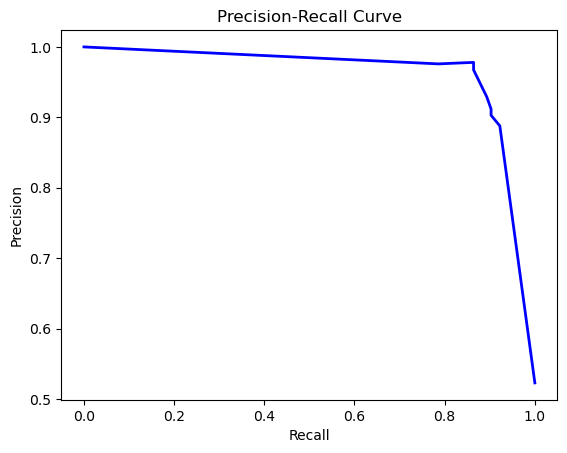

In [130]:
from sklearn.metrics import precision_recall_curve

# Calculate Precision-Recall curve
precision, recall, thresholds = precision_recall_curve(y_test_u, model_u_improved.predict_proba(X_test_scaled_u)[:,1])

plt.figure()
plt.plot(recall, precision, color='b', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

In [131]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(model_u_improved, X_train_scaled_u, y_train_u, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Average cross-validation score: {cv_scores.mean()}")

Cross-validation scores: [0.89873418 0.94936709 0.9044586  0.91082803 0.89171975]
Average cross-validation score: 0.9110215270499074


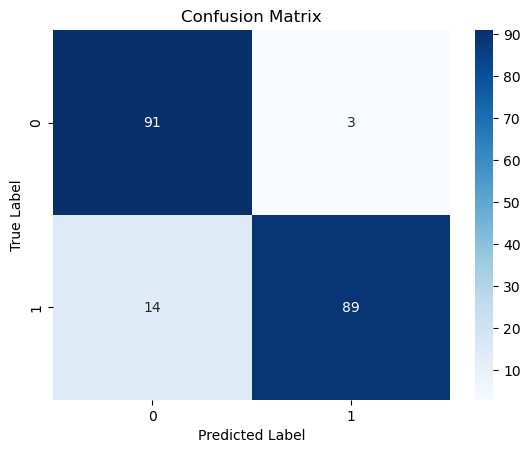

In [132]:
import seaborn as sns

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_u, y_pred_u)

# Plot confusion matrix
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [133]:
X = df.drop('Class', axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [134]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_scaled_u, y_train_u)

RandomForestClassifier(random_state=42)

In [135]:
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nTop 10 important features:")
print(feature_importance.head(10))


Top 10 important features:
   Feature  Importance
14     V14    0.184155
10     V10    0.111607
17     V17    0.098234
4       V4    0.087781
12     V12    0.086560
11     V11    0.069615
3       V3    0.062117
16     V16    0.053358
2       V2    0.036511
9       V9    0.026709


In [136]:
from sklearn.metrics import classification_report,roc_auc_score
y_pred = model.predict(X_test)
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print(f"ROC-AUC Score: {roc_auc_score(y_test, model.predict_proba(X_test)[:,1]):.4f}")

C:\Users\valla\anaconda3\lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(



Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.01      0.02     85295
           1       0.00      1.00      0.00       148

    accuracy                           0.01     85443
   macro avg       0.50      0.50      0.01     85443
weighted avg       1.00      0.01      0.02     85443



C:\Users\valla\anaconda3\lib\site-packages\sklearn\utils\validation.py:2732: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


ROC-AUC Score: 0.9309


In [189]:
import pickle
with open('model.pkl', 'wb') as f:
    pickle.dump(model_u_improved, f)

In [191]:
import json

sample_input = X_test_scaled_u[0].tolist()

with open('test_input.json', 'w') as f:
    json.dump({'features': sample_input}, f)